<a href="https://colab.research.google.com/github/TAUforPython/denoising/blob/main/%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80_%D0%9A%D0%B0%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [ ]:
def getMeasurement(updateNumber):
    if updateNumber == 1:
      getMeasurement.currentPosition = 0
      getMeasurement.currentVelocity = 60 # m/s
    dt = 0.1
    w = 0.5 * np.random.randn(1)
    v = 0.5 * np.random.randn(1)
    z = getMeasurement.currentPosition + getMeasurement.currentVelocity*dt + v
    getMeasurement.currentPosition = z - v
    getMeasurement.currentVelocity = 60 + w
    return [z, getMeasurement.currentPosition, getMeasurement.currentVelocity]


In [ ]:
def FilterKalmana(z, updateNumber):
    dt = 0.1
    # Initialize State
    if updateNumber == 1:
        FilterKalmana.x = np.array([[0], [20]])
        FilterKalmana.P = np.array([[5, 0], [0, 5]])
        FilterKalmana.A = np.array([[1, dt], [0, 1]])
        FilterKalmana.H = np.array([[1, 0]])
        FilterKalmana.HT = np.array([[1], [0]])
        FilterKalmana.R = 10
        FilterKalmana.Q = np.array([[1, 0], [0, 3]])
    # Predict State Forward
    x_p = FilterKalmana.A.dot(FilterKalmana.x)
    # Predict Covariance Forward
    P_p = FilterKalmana.A.dot(FilterKalmana.P).dot(FilterKalmana.A.T) + FilterKalmana.Q
    # Compute Kalman Gain
    S = FilterKalmana.H.dot(P_p).dot(FilterKalmana.HT) + FilterKalmana.R
    K = P_p.dot(FilterKalmana.HT)*(1/S)
    # Estimate State
    residual = z - FilterKalmana.H.dot(x_p)
    FilterKalmana.x = x_p + K * residual
    # Estimate Covariance
    FilterKalmana.P = P_p - K.dot(FilterKalmana.H).dot(P_p)
    return [FilterKalmana.x[0], FilterKalmana.x[1], FilterKalmana.P];

In [ ]:
def testFilter():
    dt = 0.1
    t = np.linspace(0, 10, num=300)
    numOfMeasurements = len(t)
    measTime = []
    measPos = []
    measDifPos = []
    estDifPos = []
    estPos = []
    estVel = []
    posBound3Sigma = []
    diffMeasEstPos = []
    for k in range(1,numOfMeasurements):
        z = getMeasurement(k)
        # Call Filter and return new State
        f = FilterKalmana(z[0], k)
        # Save off that state so that it could be plotted
        measTime.append(k)
        measPos.append(z[0])
        measDifPos.append(z[0]-z[1])
        estDifPos.append(f[0]-z[1])
        estPos.append(f[0])
        estVel.append(f[1])
        posVar = f[2]
        posBound3Sigma.append(3*np.sqrt(posVar[0][0]))
        diffMeasEstPos.append(z[0] - f[0])
    return [measTime, measPos, estPos, estVel, measDifPos, estDifPos, posBound3Sigma, diffMeasEstPos];


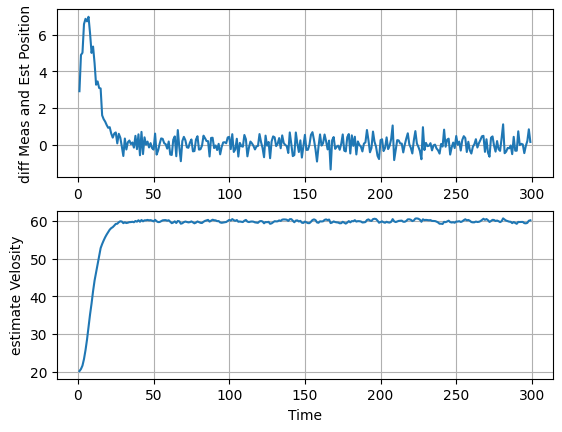

In [ ]:
t = testFilter()
ax1 = plt.subplot(211)
ax1 = plt.plot(t[0], t[7],'-')
ax1 = plt.ylabel('diff Meas and Est Position')
ax1 = plt.grid(True)

ax2 = plt.subplot(212)
ax2 = plt.plot(t[0], t[3],'-')
ax2 = plt.ylabel('estimate Velosity')
ax1 = plt.xlabel('Time')

plt.grid(True)
plt.show()

Text(0, 0.5, 'Position with noise')

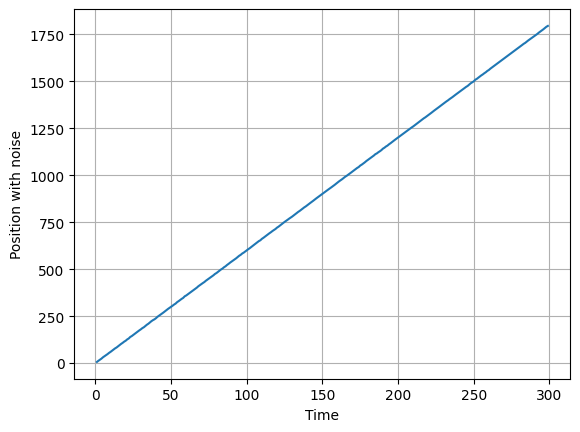

In [ ]:
plt.plot(t[0], t[1])
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('Position with noise')

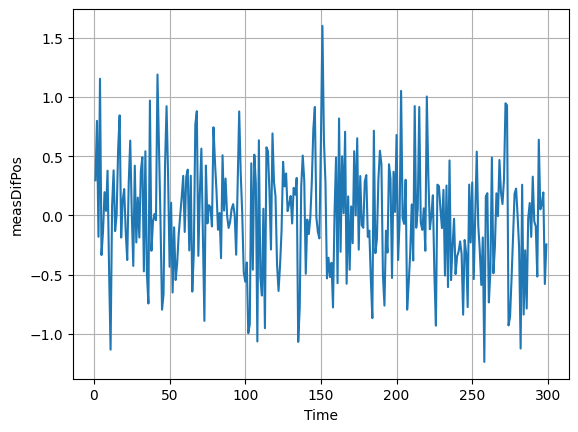

In [ ]:
t = testFilter()
plot1 = plt.figure(1)
#plt.scatter(t[0], t[1])
plt.plot(t[0], t[4],'-')
plt.ylabel('measDifPos')
#дифференцирование "в прямую" сигнала с шумом
plt.xlabel('Time')
plt.grid(True)
plt.show()

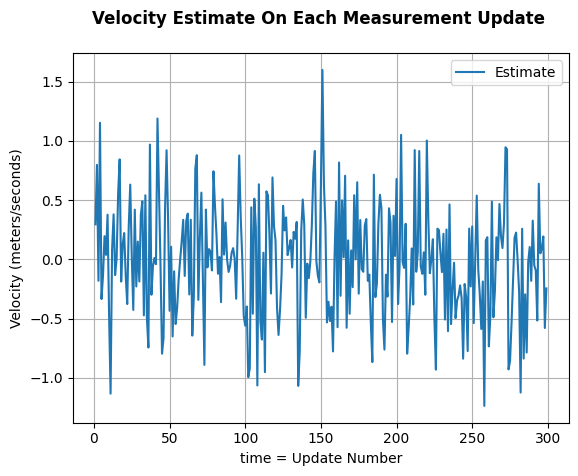

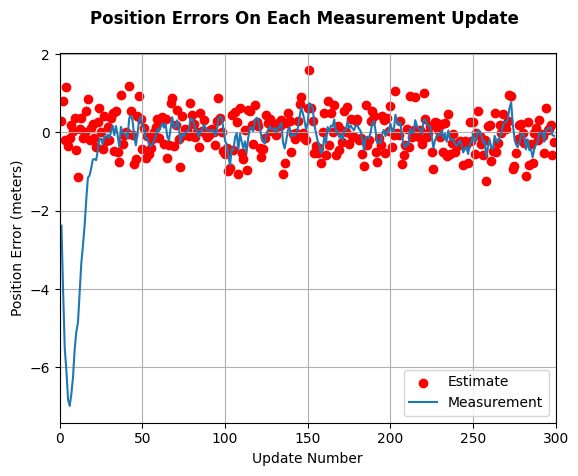

In [ ]:
plot2 = plt.figure(2)
plt.plot(t[0], t[4])
plt.ylabel('Velocity (meters/seconds)')
plt.xlabel('time = Update Number')
plt.title('Velocity Estimate On Each Measurement Update \n', fontweight="bold")
plt.legend(['Estimate'])
plt.grid(True)

plot3 = plt.figure(3)
plt.scatter(t[0], t[4], color = 'red')
plt.plot(t[0], t[5])
plt.legend(['Estimate', 'Measurement'])
plt.title('Position Errors On Each Measurement Update \n', fontweight="bold")
#plt.plot(t[0], t[6])
plt.ylabel('Position Error (meters)')
plt.xlabel('Update Number')
plt.grid(True)
plt.xlim([0, 300])
plt.show()